In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# 1. read the datasets

In [5]:
Cab_Data = pd.read_csv("Cab_Data.csv")

In [6]:
Customer_Data = pd.read_csv("Customer_ID.csv")

In [7]:
Transaction = pd.read_csv("Transaction_ID.csv")

In [8]:
City_Data = pd.read_csv("City.csv")

In [9]:
Cab_Data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [10]:
Customer_Data.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [11]:
Transaction.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [12]:
City_Data.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


# 2. Check the null data

In [13]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [14]:
Customer_Data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [15]:
Transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [16]:
City_Data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

# As we can see above, there is no null data is the datasets.

# 3. Change the data tpye, modify column names and change the data format

In [17]:
for col in Cab_Data.columns:
    print (col)

Transaction ID
Date of Travel
Company
City
KM Travelled
Price Charged
Cost of Trip


In [18]:
# a function to replace the " " string to "_"

In [19]:
def clean_empty(data):
    for col in data.columns:
        if ' ' in col:
            data = data.rename(columns={col:col.replace(' ','_')})
    return data

In [20]:
Cab_Data = clean_empty(Cab_Data)

In [21]:
Customer_Data = clean_empty(Customer_Data)

In [22]:
Transaction = clean_empty(Transaction)

In [23]:
City_Data = clean_empty(City_Data)

In [24]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [25]:
Customer_Data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [26]:
Transaction.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [27]:
City_Data.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [28]:
City_Data["Population"] = City_Data["Population"].apply(lambda x:x.replace(",","")).astype(int)

In [29]:
City_Data["Users"] = City_Data["Users"].apply(lambda x:x.replace(",","")).astype(int)

In [30]:
City_Data.tail()

,City,Population,Users
15,SACRAMENTO CA,545776,7044
16,PITTSBURGH PA,542085,3643
17,WASHINGTON DC,418859,127001
18,NASHVILLE TN,327225,9270
19,BOSTON MA,248968,80021


In [31]:
Cab_Data["Price_Charged"] = Cab_Data["Price_Charged"].astype(float)

In [32]:
Cab_Data["Cost_of_Trip"] = Cab_Data["Cost_of_Trip"].astype(float)

In [33]:
Cab_Data.dtypes

Transaction_ID      int64
Date_of_Travel      int64
Company            object
City               object
KM_Travelled      float64
Price_Charged     float64
Cost_of_Trip      float64
dtype: object

In [34]:
Cab_Data.tail()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [35]:
# change the data format

In [36]:
# the data in the Cab_Data.csv in the int format, we need change it to year and month firstly.

In [37]:
from datetime import datetime, timedelta

In [38]:
# the module datetime will transer int to date format, and the timedelta presents the passing time.

In [39]:
# fro example

In [40]:
(datetime(1899, 12, 30) + timedelta(43107)).strftime("%d-%m-%Y")

'07-01-2018'

In [41]:
def to_date_format(n):
    date_str = (datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    correct_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return correct_date

In [42]:

# Separate date in month and year
def month_year_separate(df,column_name):
    df[column_name] = df[column_name].apply(lambda x:to_date_format(x))
    months=[]
    years =[]
    for i in range(len(df[column_name])):
        months.append(df[column_name][i].month)
        years.append(df[column_name][i].year)
    df['Month'] = months
    df['Year'] = years
    df.drop(column_name, axis=1, inplace=True)
    return df


In [43]:
Cab_Data = month_year_separate(Cab_Data,'Date_of_Travel')
Cab_Data.tail()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018
359391,10440107,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,1,2018


In [44]:
Cab_Data["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [45]:
Cab_Data["Year"].unique()

array([2016, 2017, 2018], dtype=int64)

# Now the data is cleansed and ready to analysis.

# 4. Outlier Validation

# Before analysis, we need to check out anomalye values.

In [46]:
Company = Cab_Data["Company"].unique()
Company

array(['Pink Cab', 'Yellow Cab'], dtype=object)

<AxesSubplot:>

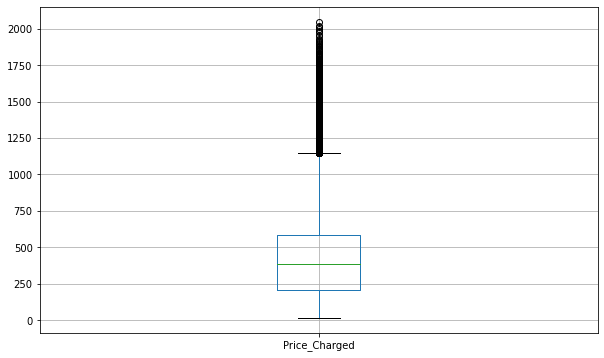

In [47]:
plt.figure(figsize=(10,6))
Cab_Data.boxplot("Price_Charged")

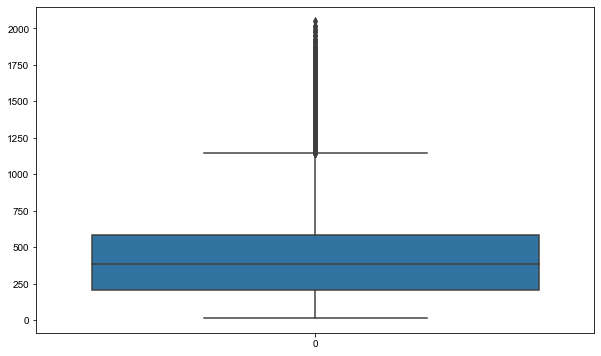

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data = Cab_Data["Price_Charged"])
sns.set_style('darkgrid')

In [49]:
# The high price values are in acceptable range, and we will keep them.

In [50]:
# We can compare the price_charged by the two companies.

In [51]:
Company_Price = []

In [52]:
for i in range(len(Company)):
    Company_Price.append(Cab_Data[Cab_Data['Company']==Company[i]])

In [53]:
# This trick will create two seperate Cab_Data with different companies:

In [54]:
Company_Price[0]

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016
...,...,...,...,...,...,...,...,...
357449,10437610,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,1,2018
357450,10437611,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,12,2018
357451,10437612,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,1,2018
357452,10437614,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,1,2018


In [55]:
Company_Price[1]

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
233,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016
234,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016
235,10000386,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016
236,10000387,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016
237,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016
...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018


D:\Anaconda\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


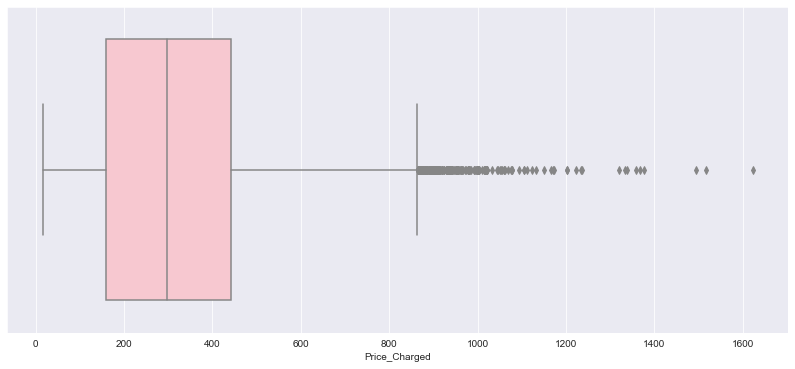

D:\Anaconda\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


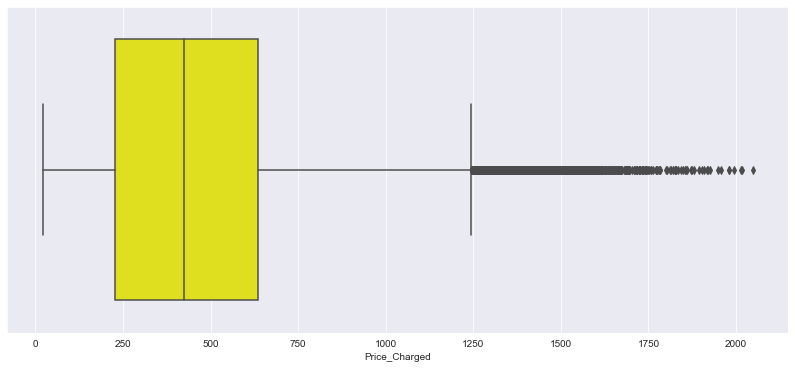

In [56]:
for i in range(len(Company)):
    plt.figure(figsize=(14,6))
    sns.set_style('darkgrid')
    sns.boxplot(Company_Price[i]['Price_Charged'], color="pink" if i == 0 else "yellow")
    plt.show()

# Both companies has some extreme price, and Yellow Cab's price is higher.

# 5. Create Master Data and Analysis

In [57]:
# We are going to merge the four data files. We can do many kind of Analysis by a master data.

In [58]:
Transaction.columns=["Transaction_ID","Customer_ID","Paymen_Mode"]

In [59]:
master_data = pd.merge(Cab_Data,Transaction,how = "inner", on= 'Transaction_ID')

In [275]:
master_data = master_data.merge(Customer_Data,how = "inner", on = "Customer_ID")

In [276]:
master_data = master_data.merge(City_Data,how = "inner", on = "City")

In [277]:
master_data.columns

Index(['Transaction_ID', 'Company', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Month', 'Year', 'Customer_ID', 'Paymen_Mode',
       'Population_x', 'Users_x', 'Margins', 'Profit', 'Gender', 'Age',
       'Income_(USD/Month)', 'Population_y', 'Users_y'],
      dtype='object')

In [73]:
User_of_City = master_data.groupby('City').Users.count()

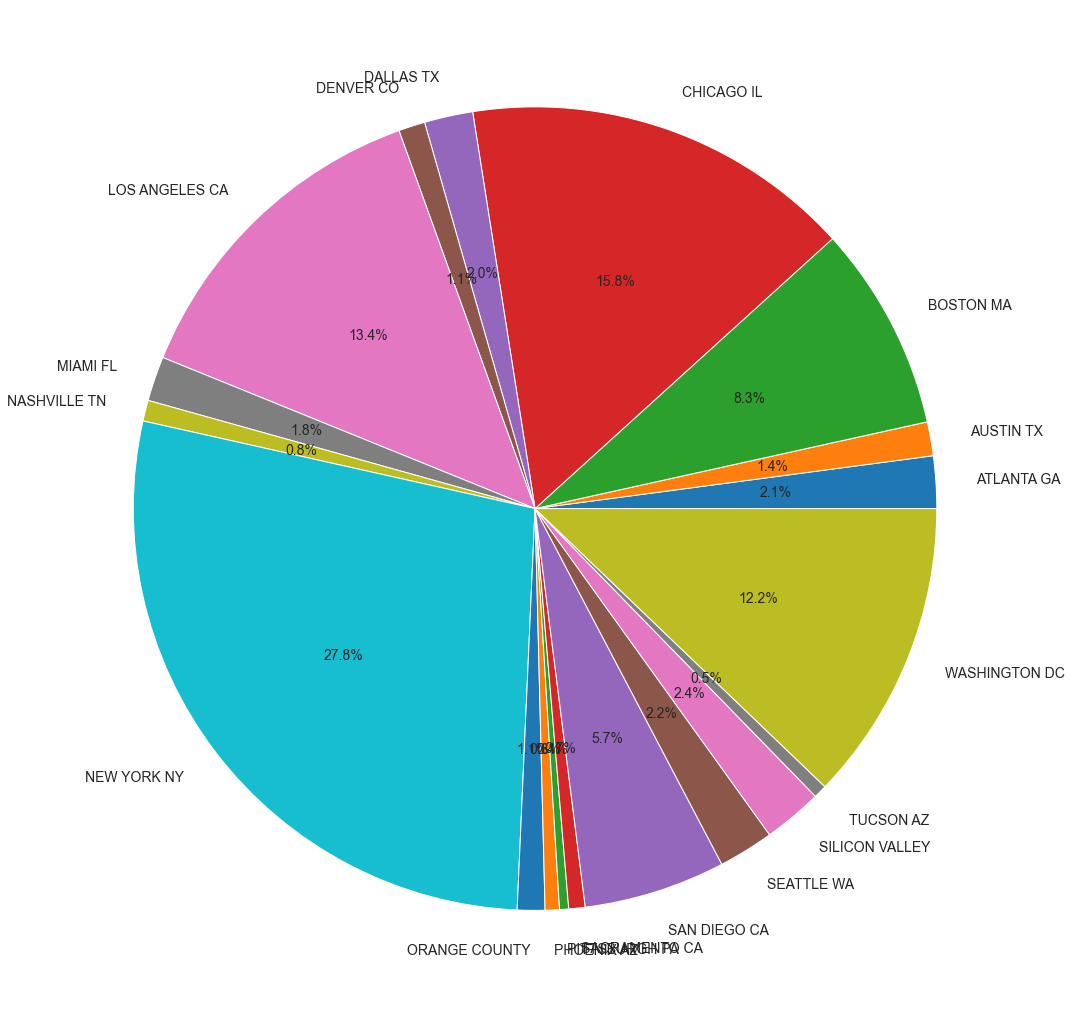

In [80]:
plt.figure(figsize=(18,25))
sns.set_style('darkgrid')
plt.pie(x=User_of_City.values,labels=User_of_City.index,autopct='%.1f%%',textprops={'fontsize': 14})
plt.show()

In [81]:
# from above, we find that the city has more cab users is New York, Washington, Los Angeles and Chigago.

In [85]:
User_of_Company = master_data.groupby('Company').Users.count()

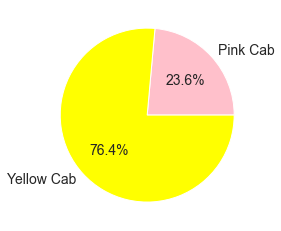

In [124]:
sns.set_style('darkgrid')
plt.pie(x= User_of_Company.values,labels=User_of_Company.index,autopct='%.1f%%',textprops={'fontsize': 14},colors = ['pink', 'yellow'])
plt.show()

In [89]:
# from above, we find that Yellow Cab has way more Users.

In [129]:
User_of_NewYork = master_data[master_data["City"] == "NEW YORK NY" ].groupby('Company').Users.count()
User_of_Washington = master_data[master_data["City"] == "WASHINGTON DC" ].groupby('Company').Users.count()
User_of_LosAngeles =  master_data[master_data["City"] == "LOS ANGELES CA" ].groupby('Company').Users.count()
User_of_ChiCaGo = master_data[master_data["City"] == "CHICAGO IL" ].groupby('Company').Users.count()

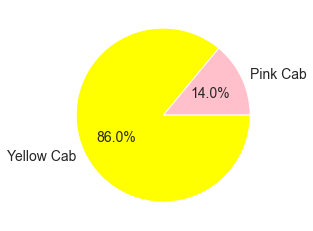

In [137]:
plt.pie(x= User_of_NewYork.values,labels=User_of_NewYork.index,autopct='%.1f%%',textprops={'fontsize': 14},colors = ['pink', 'yellow'])
plt.show()

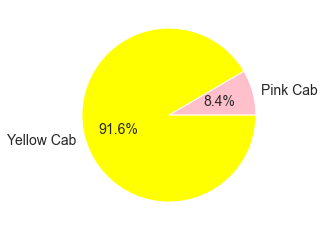

In [131]:
plt.pie(x= User_of_Washington.values,labels=User_of_Washington.index,autopct='%.1f%%',textprops={'fontsize': 14},colors = ['pink', 'yellow'])
plt.show()

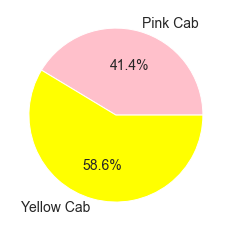

In [133]:
plt.pie(x = User_of_LosAngeles,labels = User_of_LosAngeles.index,autopct='%.1f%%',textprops={'fontsize': 14},colors = ['pink', 'yellow'])
plt.show()

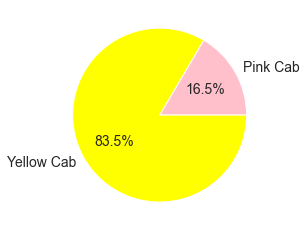

In [135]:
plt.pie(x = User_of_ChiCaGo,labels = User_of_ChiCaGo.index,autopct='%.1f%%',textprops={'fontsize': 14},colors = ['pink', 'yellow'])
plt.show()

In [138]:
# from above charts, we find that Yellow Cab has way more users in both four main cities.

# Base on the user numbers, we believe investment in Yellow Cab is a better decision

# Next, we would compare the number of transactions of two companies by month and year.

In [141]:
transaction_by_month = []
transaction_by_year = []
for i in range(2):
    transaction_by_month.append(Cab_Data[Cab_Data['Company']==Company[i]].groupby(['Month']).Transaction_ID.count())
    transaction_by_year.append(Cab_Data[Cab_Data['Company']==Company[i]].groupby(['Year']).Transaction_ID.count())

In [161]:
transaction_of_Yellow = Cab_Data[Cab_Data['Company']=="Yellow Cab"].groupby(['Month']).Transaction_ID.count()
transaction_of_Pink = Cab_Data[Cab_Data['Company']=="Pink Cab"].groupby(['Month']).Transaction_ID.count()

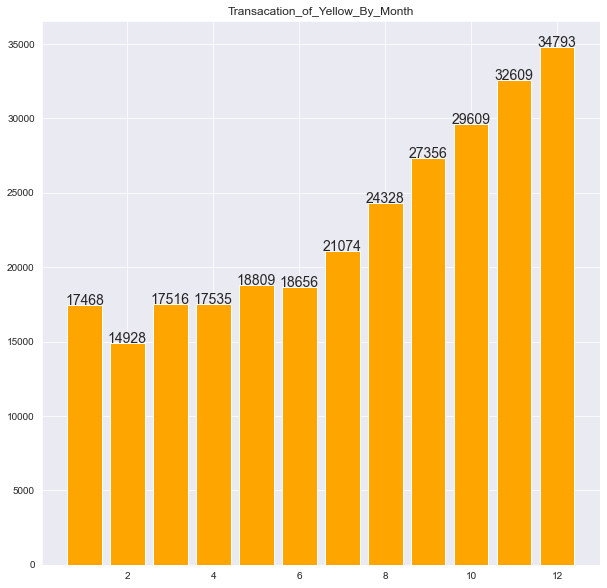

In [203]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
yellow_bar = plt.bar(x = transaction_of_Yellow.index,height = transaction_of_Yellow.values,color = "orange")
plt.title("Transacation_of_Yellow_By_Month")
for month in transaction_of_Yellow.index:
    plt.text(month,transaction_of_Yellow.values[month-1],transaction_of_Yellow.values[month-1], ha = "center", fontsize = 14)
plt.show()

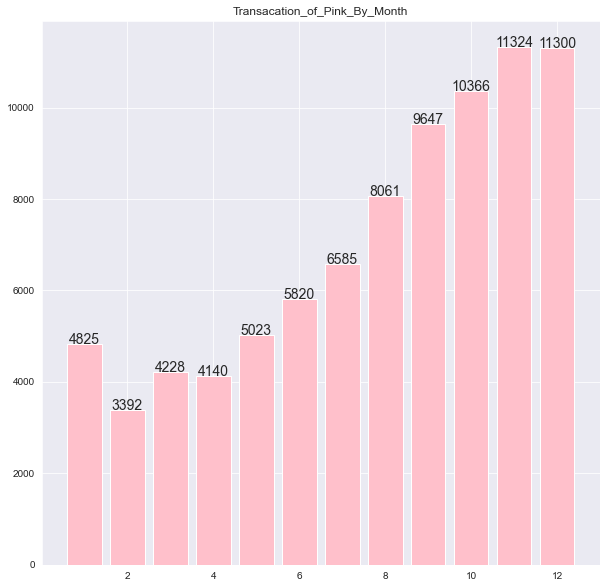

In [202]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
plt.bar(x = transaction_of_Pink.index,height = transaction_of_Pink.values,color = "Pink")
plt.title("Transacation_of_Pink_By_Month")
for month in transaction_of_Pink.index:
    plt.text(month,transaction_of_Pink.values[month-1],transaction_of_Pink.values[month-1], ha = "center",fontsize = 14)
plt.show()

In [172]:
Company

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [220]:
transaction_by_month[0].index[0]

1

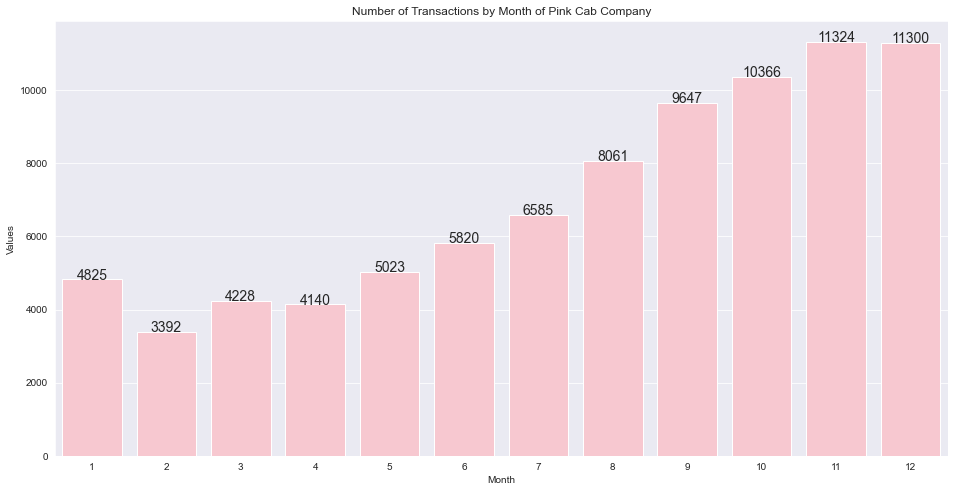

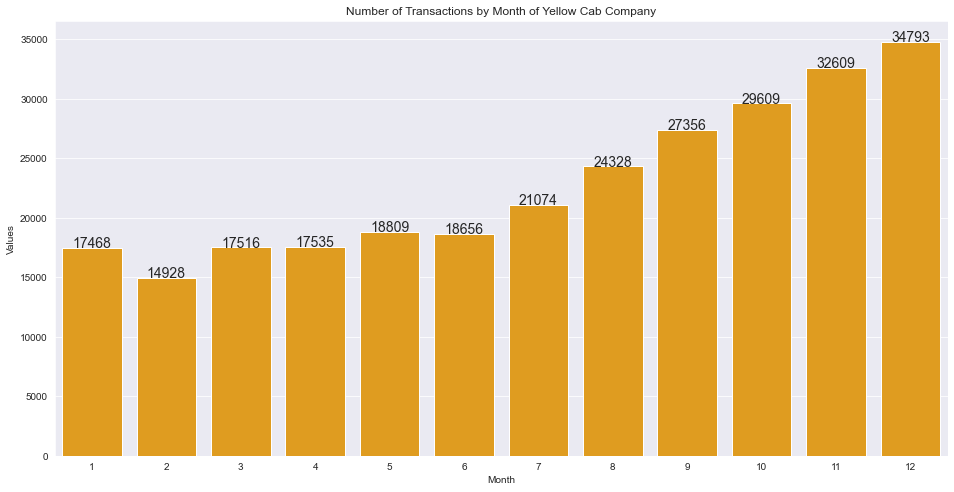

In [222]:
for i in range(2):
    plt.figure(figsize=(16,8))
    sns.set_style('darkgrid')
    sns.barplot(x=transaction_by_month[i].index,y=transaction_by_month[i].values, color = "Pink" if i == 0 else "Orange" )
    plt.title('Number of Transactions by Month of '+Company[i]+' Company',fontsize = 12)
    plt.xlabel('Month', fontsize = 10)
    plt.ylabel('Values',fontsize = 10)
    for month in transaction_by_month[i].index:
        plt.text(month-1,transaction_by_month[i].values[month-1],transaction_by_month[i].values[month-1], ha = "center", fontsize = 14)
    plt.show()

# From Above, we believe Yellow Cab has way more transactions.

In [223]:
transaction_of_Yellow = Cab_Data[Cab_Data['Company']=="Yellow Cab"].groupby(['Year']).Transaction_ID.count()
transaction_of_Pink = Cab_Data[Cab_Data['Company']=="Pink Cab"].groupby(['Year']).Transaction_ID.count()

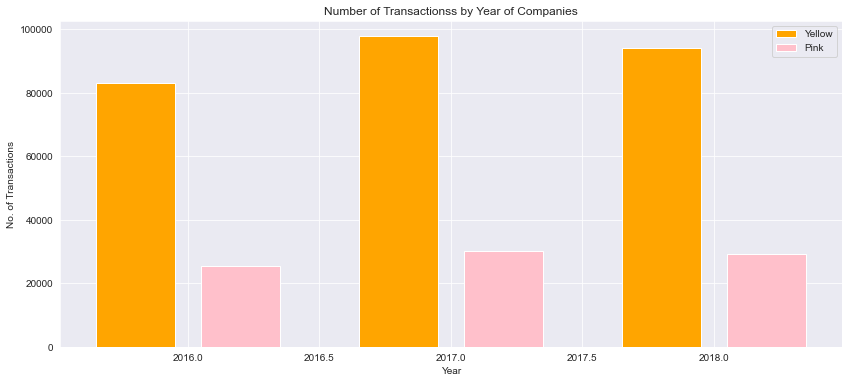

In [227]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
ax = plt.subplot(111)
ax.bar(transaction_of_Yellow.index-0.2,transaction_of_Yellow.values,width=0.3, color='Orange', align='center',label="Yellow")
ax.bar(transaction_of_Pink.index+0.2,transaction_of_Pink.values, width=0.3, color='Pink', align='center',label="Pink")
plt.title('Number of Transactionss by Year of Companies',fontsize = 12)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('No. of Transactions',fontsize = 10)
plt.legend()
plt.show()

# We can find that Both companies's transaction are stable. And Yellow Cab has way more Transactions.

# Next, we want to find the relation of KM traveled and price between two companies.

In [230]:
Yellow_KM_price = master_data[master_data["Company"]=="Yellow Cab"]
Pink_KM_price = master_data[master_data["Company"] == "Pink Cab"]           

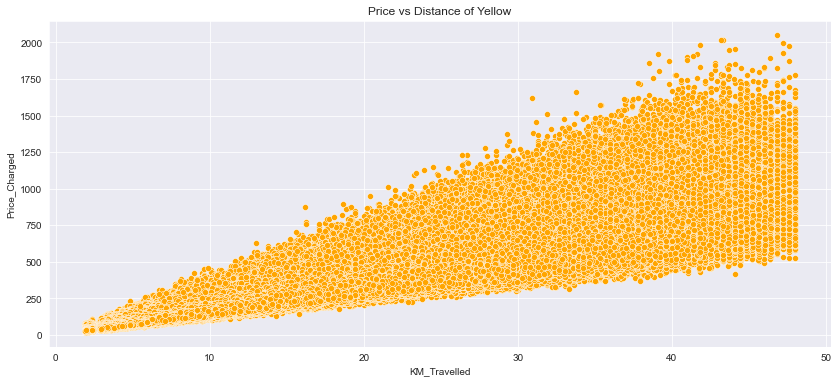

In [239]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
ax = sns.scatterplot(x = Yellow_KM_price['KM_Travelled'],y = Yellow_KM_price['Price_Charged'], color = "Orange")
plt.title("Price vs Distance of Yellow")
plt.show()

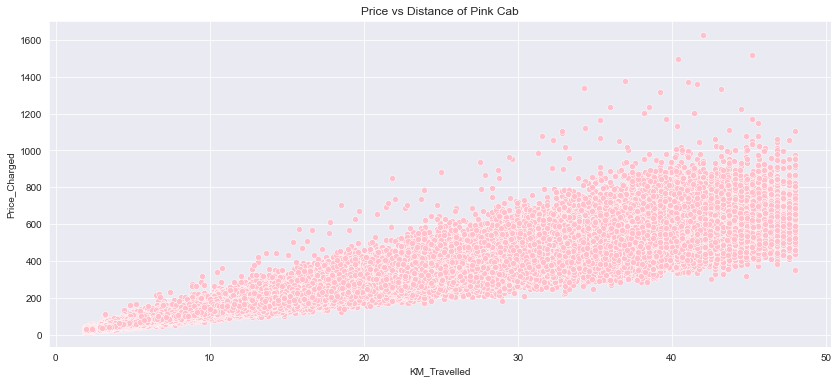

In [237]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
ax = sns.scatterplot(x = Pink_KM_price['KM_Travelled'],y = Pink_KM_price['Price_Charged'], color = "Pink")
plt.title("Price vs Distance of Pink Cab")
plt.show()

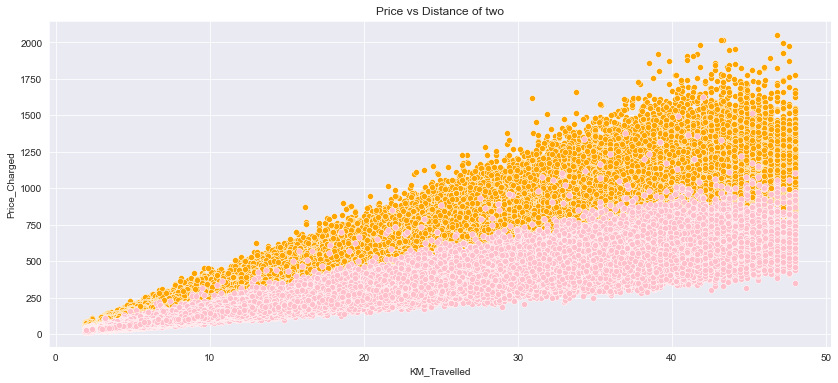

In [241]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
ax = sns.scatterplot(x = Yellow_KM_price['KM_Travelled'],y = Yellow_KM_price['Price_Charged'], color = "Orange")
ax = sns.scatterplot(x = Pink_KM_price['KM_Travelled'],y = Pink_KM_price['Price_Charged'], color = "Pink")
plt.title("Price vs Distance of two")
plt.show()

# From above, we can see that, the relation of price and distance of both companies are positive. And Yellow's ratio is higher

# Next, we will analysis the profit, which is price_charged - cost_of_trip

In [250]:
master_data['Profit'] = (master_data['Price_Charged']-master_data['Cost_of_Trip'])

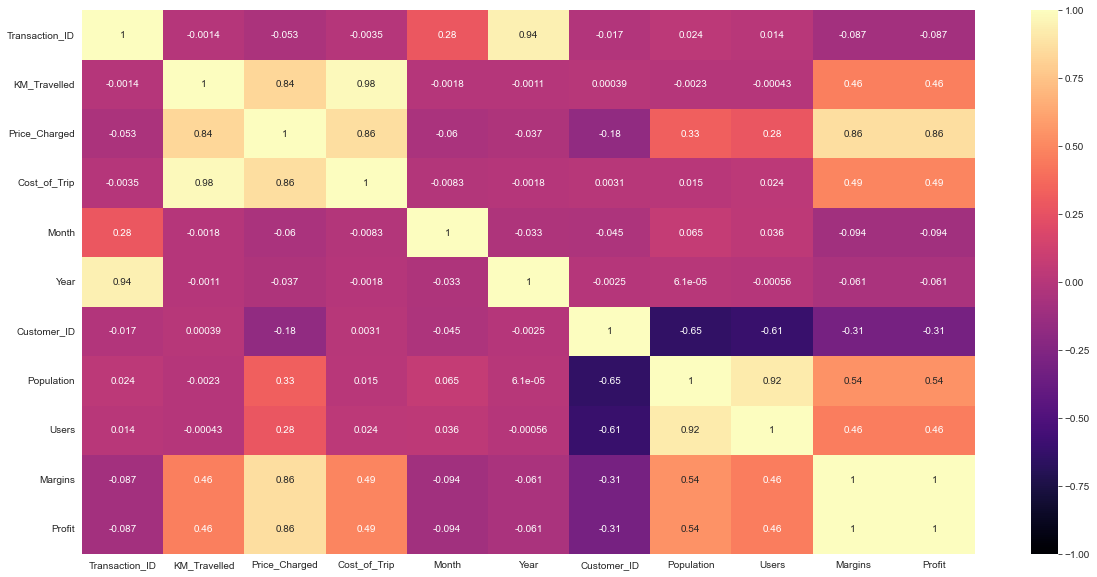

In [256]:
plt.figure(figsize=(20,10))
sns.heatmap(master_data.corr(),annot=True,vmin=-1,vmax=1,cmap='magma')
plt.show()

In [270]:
Yellow_Profit = master_data[master_data['Company']=="Yellow Cab"].groupby(['Year']).Profit.mean()
Pink_Profit = master_data[master_data['Company']=="Pink Cab"].groupby(['Year']).Profit.mean()

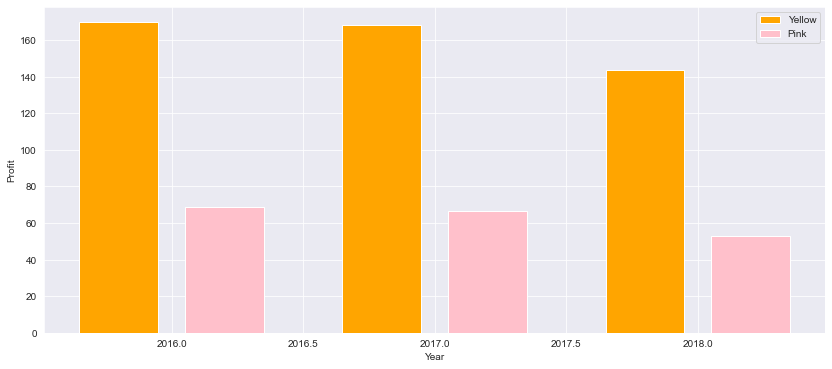

In [271]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
ax = plt.subplot(111)
ax.bar(transaction_of_Yellow.index-0.2,Yellow_Profit.values,  width=0.3, color='orange', align='center',label= "Yellow")
ax.bar(transaction_of_Pink.index+0.2,Pink_Profit.values,  width=0.3, color='pink', align='center',label= "Pink")
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Profit',fontsize = 10)
plt.legend()
plt.show()

# We can find that Yellow Cab has way more profit

# 6. Make Hypothesis

In [268]:
from scipy import stats

# We make a null hypothesis that Yellow Cab's profit has difference between geners.

In [299]:
a = master_data[(master_data["Gender"]=='Female')&(master_data["Company"]=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = master_data[(master_data["Gender"]=='Male')&(master_data["Company"]=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

In [303]:
statistic, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is difference between genders for Yellow Cab')
else:
    print('We accept null hypothesis that there is no difference between genders for Yello Cab')

We accept null hypothesis that there is no difference between genders for Yello Cab


# We make a null hypothesis that Pink Cab's profit has difference between geners.

In [304]:
a = master_data[(master_data["Gender"]=='Female')&(master_data["Company"]=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = master_data[(master_data["Gender"]=='Male')&(master_data["Company"]=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

statistic, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is difference between genders for Pink Cab')
else:
    print('We accept null hypothesis that there is no difference between genders for Pink Cab')

We accept null hypothesis that there is no difference between genders for Pink Cab


# 7.Conclusion

# From above analysis. We can make the conclusion that, Yellow Cab has higher investment value